# Load archive and plot P1D as a function of parameters

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

### Load LaCE emulator

In [2]:
from lace.emulator import p1d_archive
basedir='lace/emulator/sim_suites/Australia20/'
drop_tau_rescalings=True
archive=p1d_archive.archiveP1D(basedir=basedir,drop_tau_rescalings=drop_tau_rescalings,
                               verbose=False)

### Define function to compute dependency of P1D

In [3]:
plot_ylog=True
def plot_p1d_dependence(archive,tag,kmax=10):
    N=len(archive.data)
    val=np.array([archive.data[i][tag] for i in range(N)])
    imin=np.argmin(val)
    imax=np.argmax(val)
    min_val=val[imin]
    max_val=val[imax]
    plt.figure(figsize=[10,4])
    # first power spectrum for delta_flux
    plt.subplot(1, 2, 1)
    for i in range(N):
        data=archive.data[i]
        k_Mpc=data['k_Mpc']
        p1d_Mpc=data['p1d_Mpc']
        mask=k_Mpc<kmax
        col = plt.cm.jet((val[i]-min_val)/(max_val-min_val))
        if i in [imin,imax]:
            label=tag+' = %f'%val[i]
        else:
            label=None
        if plot_ylog:
            plt.loglog(k_Mpc[mask],(k_Mpc*p1d_Mpc)[mask],color=col,label=label)            
        else:
            plt.semilogx(k_Mpc[mask],(k_Mpc*p1d_Mpc)[mask],color=col,label=label)
    plt.xlabel(r'$k_\parallel$ [1/Mpc]')
    plt.ylabel(r'$k_\parallel \quad P_{\delta}(k_\parallel)$')
    plt.legend()
    plt.title(r'P1D of $\delta_F$ as a function of '+tag)
    # then power spectrum for F  
    plt.subplot(1, 2, 2)
    for i in range(N):
        data=archive.data[i]
        k_Mpc=data['k_Mpc']
        p1d_Mpc=data['p1d_Mpc']
        mF=data['mF']
        p1d_Mpc_F = p1d_Mpc * mF**2
        mask=k_Mpc<kmax
        col = plt.cm.jet((val[i]-min_val)/(max_val-min_val))
        if i in [imin,imax]:
            label=tag+' = %f'%val[i]
        else:
            label=None
        if plot_ylog:
            plt.loglog(k_Mpc[mask],(k_Mpc*p1d_Mpc_F)[mask],color=col,label=label)
        else:
            plt.semilogx(k_Mpc[mask],(k_Mpc*p1d_Mpc_F)[mask],color=col,label=label)
    plt.xlabel(r'$k_\parallel$ [1/Mpc]')
    plt.ylabel(r'$k_\parallel \quad P_F(k_\parallel)$')
    plt.legend()
    plt.title(r'P1D of $F$ as a function of '+tag)

### Plot dependencies in redshift

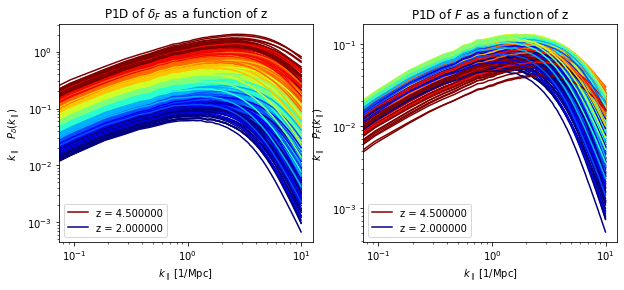

In [4]:
for param in ['z']:
    plot_p1d_dependence(archive,param)

### Plot dependencies on cosmological parameters (linear power)

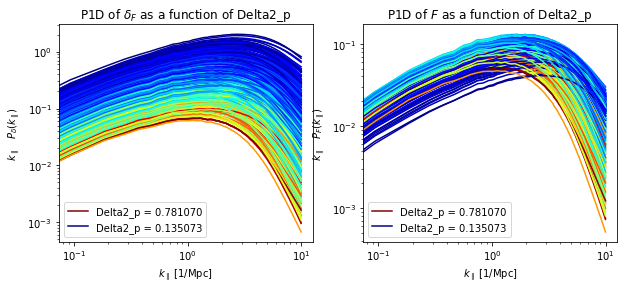

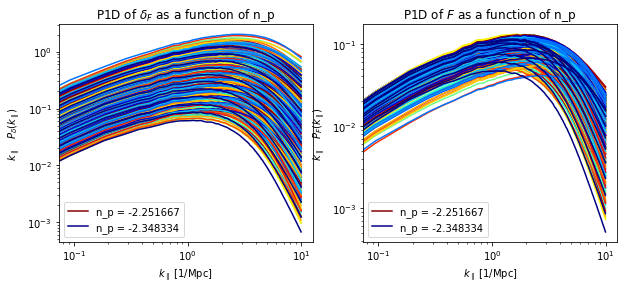

In [5]:
for param in ['Delta2_p','n_p']:
    plot_p1d_dependence(archive,param)

### Plot dependencies on IGM parameters

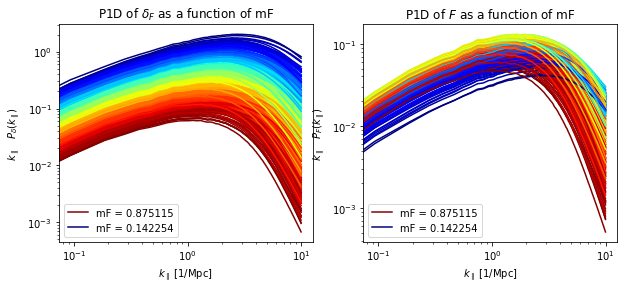

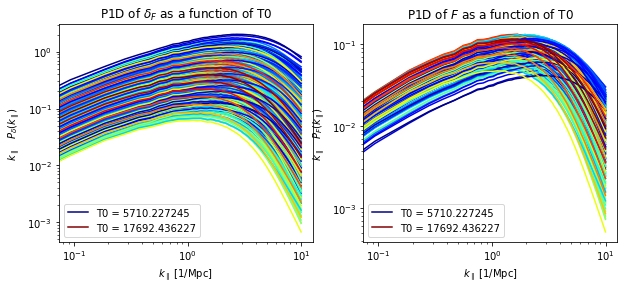

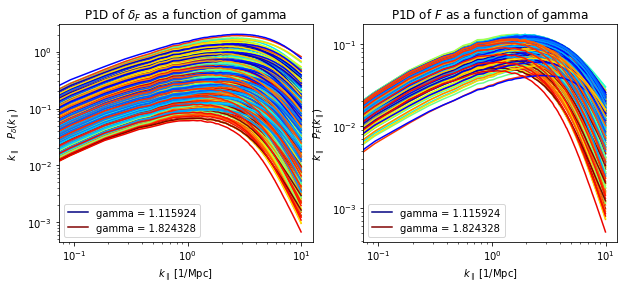

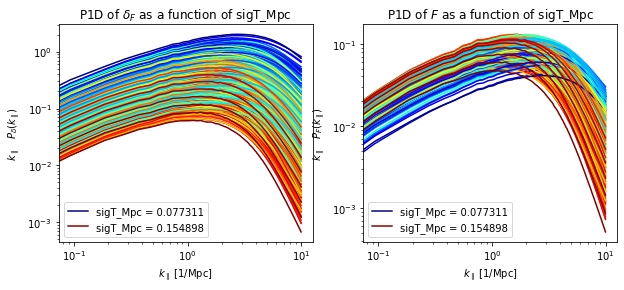

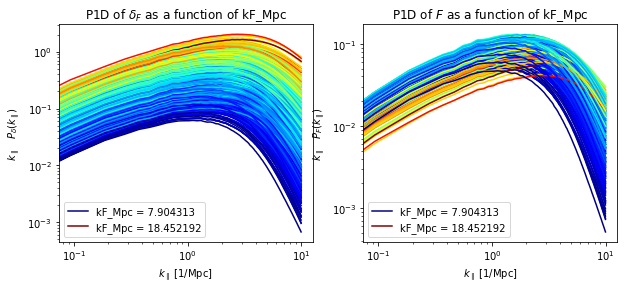

In [6]:
for param in ['mF','T0','gamma','sigT_Mpc','kF_Mpc']:
    plot_p1d_dependence(archive,param)